<center><h1><b><u>BA2MOTIFS</u></b></h1></center>

## __Importing Libraries, Classes, and Functions__

In [7]:
#BA2MOTIFS
import torch
from torch_geometric.datasets import BA2MotifDataset
import torch_geometric.transforms as T
from torch_geometric.utils import is_undirected, degree
import matplotlib.pyplot as plt

#Custom BA2MOTIFS
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import ExplainerDataset
from torch_geometric.datasets.graph_generator import BAGraph
from torch_geometric.datasets.motif_generator import HouseMotif, CycleMotif

#BA2MOTIFS graph from scratch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx #focuses on network analysis and graph theory; can create/visualize graphs
import inspect #for viewing source code
import pprint

## __Viewing Source Code__

In [2]:
source_code = inspect.getsource(ExplainerDataset)

#with open('../source.py', 'w') as file:
    #file.write(source_code)

## __Visualizing BA Graph__

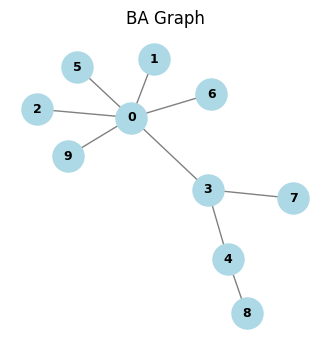

In [3]:
G = nx.barabasi_albert_graph(10, 1)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(4, 4))
plt.axis('off')
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size = 9, node_size=500, font_weight='bold')
plt.title("BA Graph")
plt.show()

## __BA2MOTIF Dataset__

### __Analyze Degree Count__

In [ ]:
ba2motifs = BA2MotifDataset(root='../data/BA2MOTIF', transform=T.ToUndirected()) #makes sure all graphs are undirected

In [14]:
def degree_distribution(graph):
    deg = degree(graph.edge_index[0], num_nodes=graph.num_nodes) #tensor of each source node in graph

    deg_int = deg.long() #long integer
    degree_counts = torch.bincount(deg_int) #tensor where tensor[i] = nodes with degree i

    print("Degree distribution:")
    for degre, count in enumerate(degree_counts):
        if count > 0:
            print(f"Degree {degre}: {count.item()} nodes")

    plt.figure(figsize=(6, 4))
    plt.bar(range(len(degree_counts)), degree_counts.numpy()) #degree_counts is height of each bar
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution')
    plt.show()

Degree distribution:
Degree 1: 12 nodes
Degree 2: 8 nodes
Degree 3: 3 nodes
Degree 4: 1 nodes
Degree 9: 1 nodes


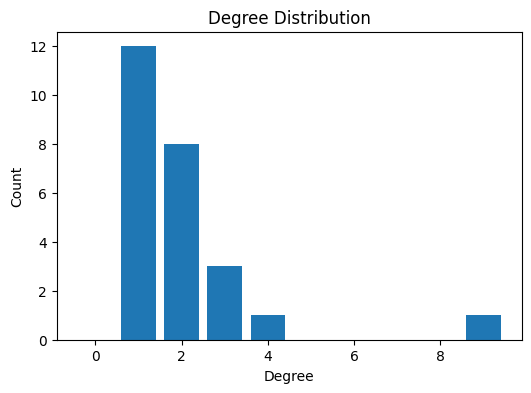

In [15]:
degree_distribution(ba2motifs[0])

### __Visualize Dataset Elements__

In [16]:
def visualize_graph(graph, position, title, color):
    G = to_networkx(graph, to_undirected=True)
    pos1 = nx.spring_layout(G)
    nx.draw(G, pos1, ax=position, with_labels=True, node_color=color, node_size=500, font_size=10, font_weight='bold')
    position.set_title(title)

def side_by_side(graph1, graph2, title1='', title2=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    visualize_graph(graph1, ax1, title1, 'lightblue')
    visualize_graph(graph2, ax2, title2, 'lightgreen')
    
    plt.tight_layout()
    plt.show()

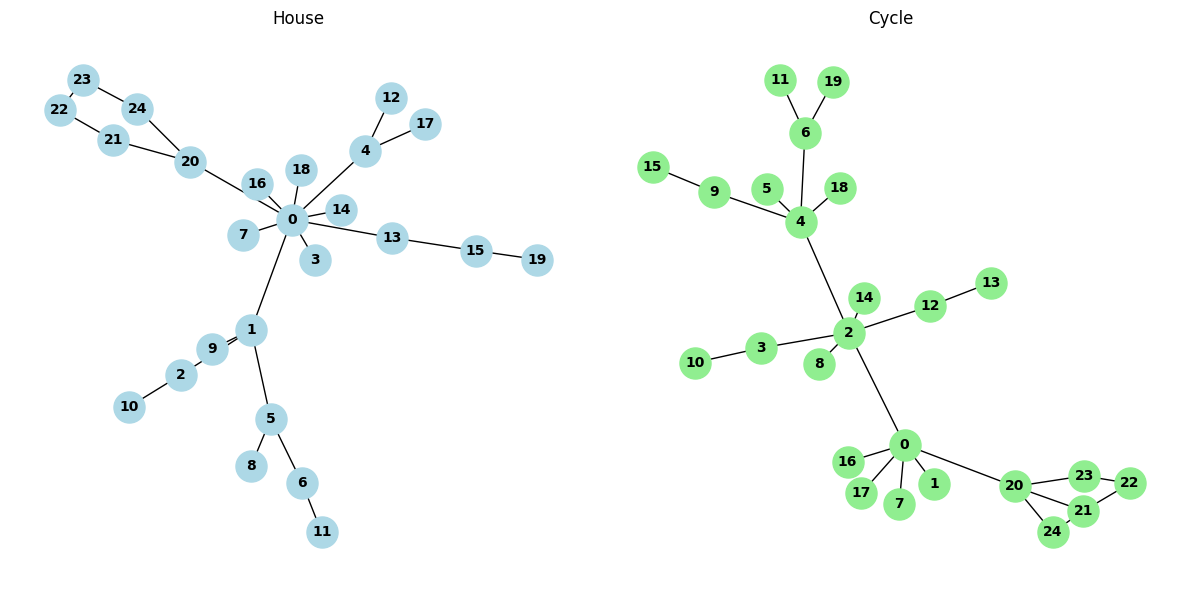

In [25]:
house_graph = next(graph for graph in ba2motifs if graph.y.item() == 0) #0 -> house; next() gets next item of iterator that satisfies condition
cycle_graph = next(graph for graph in ba2motifs if graph.y.item() == 1)

side_by_side(house_graph, cycle_graph, title1='House', title2='Cycle')

## __Custom BA Motif Dataset__

In [85]:
house = ExplainerDataset(
    graph_generator=BAGraph(num_nodes=5, num_edges=1),
    motif_generator=HouseMotif(),
    num_motifs=1,
    num_graphs=500,
)

cycle = ExplainerDataset(
    graph_generator=BAGraph(num_nodes=5, num_edges=1),
    motif_generator=CycleMotif(6),
    num_motifs=1,
    num_graphs=500,
)

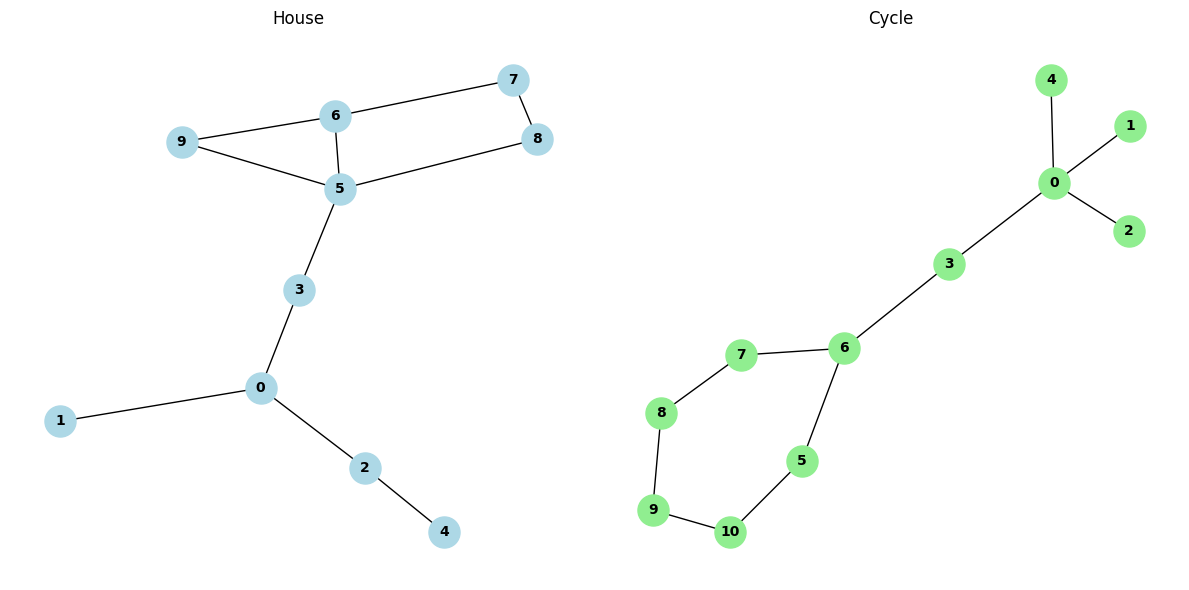

In [117]:
idx = 0
side_by_side(house[idx], cycle[idx], 'House', 'Cycle')